### Notebook 1:  Clustering con K-means
En este notebook vamos a implementar el algoritmo de clustering K-means en R. El objetivo es entender como funciona este algoritmo y  aprender a utilizarlo con un ejemplo simple. Se incluye además la estrategia para definir el número de grupos k. Al final se propone un ejercicio con nuevos datos, con el fin de aprender a utilizar el algoritmo. 

In [ ]:
library(cluster)
library(ggplot2)

#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
datos <-read.table("c:\\milk.dat",row.names=1,dec=".",header=TRUE)
summary(datos)

Ejercicio 1: describa los datos y discuta la pertinencia de realizar un análisis de clustering o agrupamiento

Pienso que es pertinente realizar un análisis de clustering pues, primero estos datos son los componentes de las leches de diferentes animales, es decir podrían existir similitudes entre alguno de los componentes de las leches de diferents animales y estas se podrian agrupar, por esta razon sería interesante realizar un análisis de agrupamiento, para determinar las similitudes entre los componentes en las leches de diferetnes animales.

In [ ]:
#ingresar valor de k0 
k0=3
cl<-kmeans(datos,k0,iter.max=1000,nstart=10)
#grafica los datos coloreados con el grupo asignado en planos de pares de variables
pairs(datos,col=cl$cluster)

Ejercicio 2: Interprete y comente los resultados obtenidos. 

Los datos fueron agrupados en 3 grupos cada uno de los cuales tiene las siguientes características:<br>

Agrupamiento Negro:
- Niveles altos de agua
- Niveles bajos de grasa
- Medios y altos niveles de lactosa
- Medios y bajos niveles de minerales<br>

Agrupamiento Rojo:
- Niveles medios de agua
- Niveles medios de grasas
- Niveles medios de lactosa

Agrupamiento verde:
- Niveles bajos de agua
- Niveles altos de proteina
- Niveles altos de grasa
- Niveles bajos de lactosa.
- Niveles bajos de minerales.

,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5
1,1.243827,0.0248324,0.07949783,-0.02299768,0.004865841
2,-1.748439,0.5834780,-0.20968076,0.06088255,-0.002705362
3,-3.831081,-2.2408320,0.09790001,-0.02910750,-0.029457957


K-means clustering with 3 clusters of sizes 16, 7, 2

Cluster means:
     WATER   PROTEIN      FAT  LACTOSE      ASH
1 86.06250  4.275000  4.17500 5.118750 0.635625
2 69.47143  9.514286 16.28571 2.928571 1.432857
3 45.65000 10.150000 38.45000 0.450000 0.690000

Clustering vector:
     HORSE  ORANGUTAN     MONKEY     DONKEY      HIPPO      CAMEL      BISON 
         1          1          1          1          1          1          1 
   BUFFALO GUINEA_PIG        CAT        FOX      LLAMA       MULE        PIG 
         1          1          1          1          1          1          1 
     ZEBRA      SHEEP        DOG   ELEPHANT     RABBIT        RAT       DEER 
         1          1          2          2          2          2          2 
  REINDEER      WHALE       SEAL    DOLPHIN 
         2          2          3          3 

Within cluster sum of squares by cluster:
[1] 377.2215 299.9911  27.1912
 (between_SS / total_SS =  89.9 %)

Available components:

[1] "cluster"      "centers"

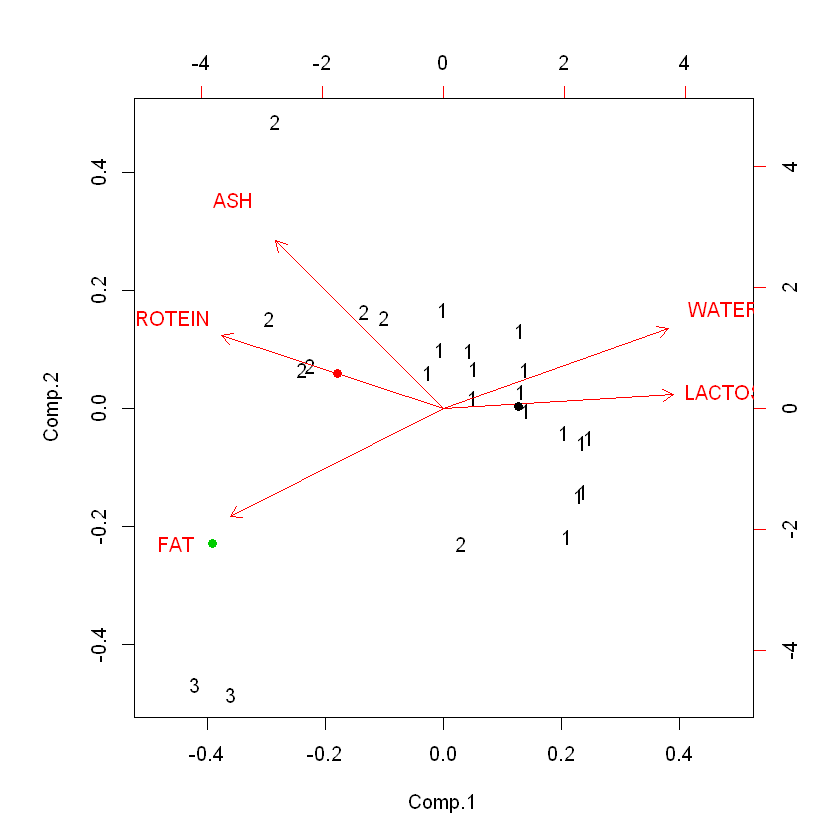

In [3]:
#Análisis de Componentes Principales para graficar los grupos obtenidos
#Calcula plano de componentes principales y grafica las observaciones con el número de su grupo
res <- princomp(datos, cor=TRUE)
res2 <- predict(res,cl$centers)
res2
cl
biplot(res,xlabs=cl$cluster)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:k0,pch=19)


Ejercicio 3: Repita el procedimiento considerando 2 y 4 grupos. Discuta sus resultados.

PARA K=2

In [ ]:
#ingresar valor de k0 
k0=2
cl<-kmeans(datos,k0,iter.max=1000,nstart=10)
#grafica los datos coloreados con el grupo asignado en planos de pares de variables
pairs(datos,col=cl$cluster)

In [ ]:
#Análisis de Componentes Principales para graficar los grupos obtenidos
#Calcula plano de componentes principales y grafica las observaciones con el número de su grupo
res <- princomp(datos, cor=TRUE)
res2 <- predict(res,cl$centers)
res2
cl
biplot(res,xlabs=cl$cluster)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:k0,pch=19)

PARA K=4

In [ ]:
#ingresar valor de k0 
k0=4
cl<-kmeans(datos,k0,iter.max=1000,nstart=10)
#grafica los datos coloreados con el grupo asignado en planos de pares de variables
pairs(datos,col=cl$cluster)

In [ ]:
#Análisis de Componentes Principales para graficar los grupos obtenidos
#Calcula plano de componentes principales y grafica las observaciones con el número de su grupo
res <- princomp(datos, cor=TRUE)
res2 <- predict(res,cl$centers)
res2
cl
biplot(res,xlabs=cl$cluster)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:k0,pch=19)

-------------------------------------------

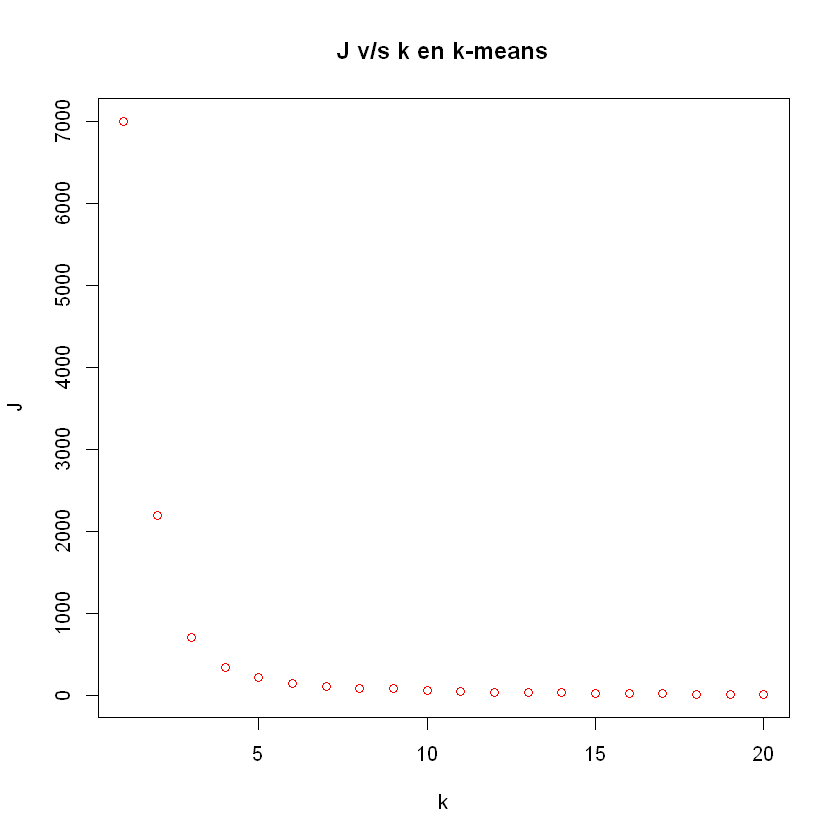

In [4]:
#Estrategia para elegir K, el numero de grupos
#J suma cuadrado de las distancias por cada k utilizado
#K-means
J<-rep(0,20)
fin_iter<-20


for (k in 1:fin_iter){
     cl<-kmeans(datos,k,iter.max=1000,nstart=10)
	 J[k]<-cl$tot.withinss
}


plot(1:fin_iter,J,xlab="k",ylab="J",type="p",main="J v/s k en k-means",col=2) 

Ejercicio 4: de acuerdo al gráfico obtenido, cuál es el valor de K mas apropiado?
Agregue código para automatizar este criterio.

Respuesta:<br>
De acuerdo al gráfico el K mas apropiado sería 4.

Ejercicio 5: Realice un análisis de clustering con el conjunto de datos DatosUsoFacebook.csv
Interprete sus resultados.

In [ ]:
#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
datos <-read.table("DatosUsoFacebook.dat",row.names=1,dec=".",header=TRUE)
summary(datos)

In [ ]:
#ingresar valor de k0 
k0=3
cl<-kmeans(datos,k0,iter.max=1000,nstart=10)
#grafica los datos coloreados con el grupo asignado en planos de pares de variables
pairs(datos,col=cl$cluster)

In [ ]:
#Análisis de Componentes Principales para graficar los grupos obtenidos
#Calcula plano de componentes principales y grafica las observaciones con el número de su grupo
res <- princomp(datos, cor=TRUE)
res2 <- predict(res,cl$centers)
res2
cl
biplot(res,xlabs=cl$cluster)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:k0,pch=19)